# Project 3: Web API & NLP Exploratory Data Analysis and Data Pre-processing

## Libraries Importing

In [1]:
# Import standard libraries
import requests
import pandas as pd
import time
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Import scikit learn libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Import natural language processing relevant libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import spacy

## load English model and instantiate
nlp = spacy.load("en_core_web_sm")


## Data Importing

In [2]:
# Importing disneland and universal json data
disney_df = pd.read_json('Data/disneyland_dropped.json')
universal_df = pd.read_json('Data/universal_dropped.json')

In [3]:
# Preview disney data
disney_df.head()

,vote,title,text,date
0,12,[Poll] Is this ok?,"Hey, /r/disneyland. I think I'll try and post ...",2011-10-04
1,8,Favorite Land?,"So, what's YOUR favorite land in Disneyland?",2011-10-09
2,4,Does anyone have any pictures from inside club...,Hey everyone! I don't know if you're allowed t...,2011-10-10
3,4,Who is your favorite face character?,I love Bert and Mary. I think it's something a...,2011-10-10
4,7,Does Disneyland drug test employees? (x-post f...,"I have an interview Friday, and I'd like to kn...",2011-11-10


In [4]:
# Preview disney data last 5 rows
disney_df.tail()

,vote,title,text,date
3852,3,What day to get Maxpass,I'm going to Disneyland/DCA in October for a w...,2017-09-28
3853,4,Disneyland questions,As it turns out as I’m preparing for my WDW Ch...,2017-09-28
3854,5,Plaza inn character buffet,Hi all! I have a question. So on Saturday morn...,2017-09-29
3855,1,How late can you pay for your visit?,"Looking through the FAQ, I didn't see anything...",2017-09-29
3856,12,Visiting Disneyland during Christmas!,"So, my family and I (wife, 8 y/o boy, 6 y/o bo...",2017-09-29


- The data spans from October 2011 to September 2017

In [5]:
# Preview universal data
universal_df.head()

,vote,title,text,date
0,2,"My First Trip to Halloween Horror Nights, Orla...",Any tips from seasoned pros for my first trip ...,2011-08-17
1,1,Why are the prices for tickets cheaper during ...,I was planning on going this year and it seems...,2013-10-23
2,2,Handicap Policy,My family has a trip planned to Universal Stud...,2014-03-15
3,7,Halloween Horror Nights 2014,Halloween Horror Nights 2014 information is st...,2014-03-24
4,1,Harry Potter soft opening? If I'm there when i...,My fiance and I are going to be at Universal f...,2014-05-13


In [6]:
# Preview universal data last 5 rows
universal_df.tail()

,vote,title,text,date
1496,1,Im confused on how the neighbor pass actually ...,I live in texas and looking to go to Universal...,2023-06-19
1497,1,Anyone know when the Jurassic Park 30th annive...,I’m planning a at trip in the next two months ...,2023-06-21
1498,0,Express Passes needed around Chirstmas time?,Planning to spend 2 days at USJ. I recently re...,2023-10-23
1499,2,Upgrading to a season pass at the park,Anyone know how much they tend to charge at th...,2023-11-03
1500,1,5 days for price of 3 promotion - available mo...,My family is going to Universal in Mar 2024 du...,2023-11-04


- The data spans from August 2011 to November 2023

## Data Examining and Cleaning

In [7]:
# Obtain Disney data summary
disney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3857 entries, 0 to 3856
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   vote    3857 non-null   int64         
 1   title   3857 non-null   object        
 2   text    3857 non-null   object        
 3   date    3857 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 120.7+ KB


- The dataframe contains 3857 rows with 4 columns
- 1 integer type column, 2 object type column, and 1 datetime type column
- Containing no null values

In [8]:
# Obtain Universal data summary
universal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   vote    1501 non-null   int64         
 1   title   1501 non-null   object        
 2   text    1501 non-null   object        
 3   date    1501 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 47.0+ KB


- The dataframe contains 1501 rows with 4 columns
- 1 integer type column, 2 object type columns, and 1 data type column
- Containing no null values

In [9]:
# Obtain descriptive statistics data from disney data
disney_df.describe(include='all')

,vote,title,text,date
count,3857.000000,3857,3857,3857
unique,NaN,3846,3857,NaN
top,NaN,Disneyland Hotel,"Hey, /r/disneyland. I think I'll try and post ...",NaN
freq,NaN,2,1,NaN
mean,10.382940,NaN,NaN,2015-10-20 21:02:39.605911552
min,0.000000,NaN,NaN,2011-10-04 00:00:00
25%,3.000000,NaN,NaN,2014-12-14 00:00:00
50%,6.000000,NaN,NaN,2015-12-02 00:00:00
75%,11.000000,NaN,NaN,2016-12-06 00:00:00
max,217.000000,NaN,NaN,2017-09-29 00:00:00



- Vote contains outliers since max is out of range of the 75% percentile
- Title contains duplicates

In [10]:
# Obtain descriptive statistics data from universal data
universal_df.describe(include='all')

,vote,title,text,date
count,1501.000000,1501,1501,1501
unique,NaN,1497,1501,NaN
top,NaN,Super Nintendo World,Any tips from seasoned pros for my first trip ...,NaN
freq,NaN,2,1,NaN
mean,5.313791,NaN,NaN,2020-01-27 09:57:40.892738048
min,0.000000,NaN,NaN,2011-08-17 00:00:00
25%,2.000000,NaN,NaN,2017-06-24 00:00:00
50%,4.000000,NaN,NaN,2020-08-23 00:00:00
75%,6.000000,NaN,NaN,2022-10-02 00:00:00
max,76.000000,NaN,NaN,2023-11-04 00:00:00


- Vote contains outliers since max is out of range of the 75% percentile
- Title contains duplicates

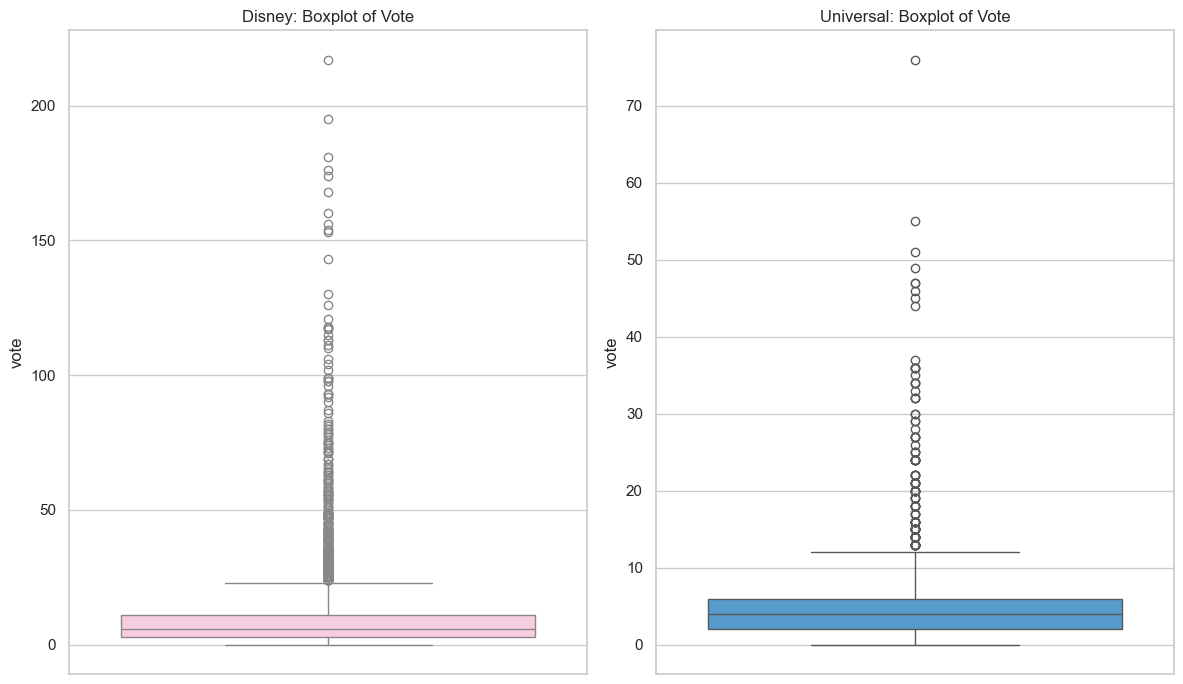

In [11]:
# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Create a figure with two subplots side by side
plt.figure(figsize=(12, 7))

# Create the first subplot for Disney DataFrame
plt.subplot(1, 2, 1)
sns.boxplot(data=disney_df, y='vote', color='#ffc5e0')
plt.title('Disney: Boxplot of Vote')

# Create the second subplot for Universal DataFrame
plt.subplot(1, 2, 2)
sns.boxplot(data=universal_df, y='vote', color='#439ee1')
plt.title('Universal: Boxplot of Vote')

# Adjust layout for better spacing (optional)
plt.tight_layout()

# Show the plot
plt.savefig('boxplot.png')

In [12]:
# Drop null NaN values from text and title columns from disney and universal data
disney_df.dropna(subset=['text', 'title'], inplace=True)
universal_df.dropna(subset=['text', 'title'], inplace=True)

## Exploratory Data Analysis

In [13]:
# Grouped title and calculate the mean of vote of disney data then sort values descending order
title_ranked = disney_df.groupby('title')['vote'].mean().sort_values(ascending=False)

# Create a dataframe of the title and mean rote sort descending
top_title = pd.DataFrame(title_ranked)
top_title.head(10)

,vote
title,
Can confirm: new Disneyland parade policy in action,217.0
"I am 17 years old. Last Dec. I went to Disneyland for the first time. Since then, I've been saving money for a less-fortunate family to go. I surprised them yesterday at the Disneystore.",195.0
Fire on big thunder trail yesterday.,181.0
Thank you to the kind stranger.,176.0
PSA to everyone wishing to ride GotG: Monster's After Dark (so your experience isn't ruined like mine was.):,174.0
Pirates of the Caribbean Officially Open!,168.0
Changes/updates on Pirates! NSFW,160.0
"Dear Cast Members of the Disneyland Resort,",156.0
"Today is the 15th anniversary of DCA, so I thought I'd put something together for the occasion.",154.0


In [14]:
# Grouped title and calculate the mean of vote of universal data then sort values descending order
title_ranked = universal_df.groupby('title')['vote'].mean().sort_values(ascending=False)

# Create a dataframe of the title and mean rote sort descending
top_title = pd.DataFrame(title_ranked)
top_title.head(10)

,vote
title,
"Dont buy the tickets, save the money.",76.0
Some stories of mine from working at Islands of Adventure.,55.0
Harry Potter and the Forbidden Journey's Loss...,51.0
Universal Studios Japan Super Nintendo World AMA,49.0
Thanks you to all the universal studios Hollywood team members today.,47.0
Toadstool Cafe is weirdly unaccommodating.,47.0
Pass Holder Preview Registration for Super Nintendo World @ USH Has Been Delayed Until Further Notice,46.0
JURASSIC WORLD FULL RIDE SOFT OPENING NIGHT TIME POV,45.0
"Fast and the Furious, sorry universal what were you thinking?",44.0


In [15]:
# Sort top 10 vote of title and text of disney data
top10_high_vote_posts_disney = disney_df.sort_values(by = 'vote', ascending = False)[['title', 'text', 'vote']]
top10_high_vote_posts_disney.head(10)

,title,text,vote
3132,Can confirm: new Disneyland parade policy in a...,Was at Disneyland Tuesday night and castmember...,217
1063,I am 17 years old. Last Dec. I went to Disneyl...,I have never felt so happy about something.\n\...,195
3722,Fire on big thunder trail yesterday.,Yesterday I was walking through big thunder tr...,181
2377,Thank you to the kind stranger.,On Thursday night I was trying to get my daugh...,176
3805,PSA to everyone wishing to ride GotG: Monster'...,Please do not film the ride! The ride itself i...,174
3175,Pirates of the Caribbean Officially Open!,Was at the park for open and was heading to Bi...,168
3209,Changes/updates on Pirates! NSFW,I saw people in the subreddit saying that ther...,160
1341,"Dear Cast Members of the Disneyland Resort,",You guys did it! \n\n\nThank you for all that ...,156
2066,"Today is the 15th anniversary of DCA, so I tho...","Opening Day was Feb. 8th, 2001! \n\n\nOriginal...",154
1541,Wanted to thank this sub.,A few days ago I made a post about being stuc...,153


In [16]:
# View the full title and text of top 10 high vote posts
for index, row in top10_high_vote_posts_disney.head(10).iterrows():
    print(f"Title: {row['title']}\nText: {row['text']}\nVotes: {row['vote']}\n{'='*50}\n")

Title: Can confirm: new Disneyland parade policy in action
Text: Was at Disneyland Tuesday night and castmembers were telling every one laying out blankets or sitting down on the parade route that they could not save spots until the ropes were brought out. We were told to fold up our blankets and move strollers. People on benches were asked if they were waiting for the parade - if they said "Yes" they were asked to moved. People were booted off the curb on Main Street, too.


The castmembers told me this is a new policy they found out about Tuesday morning. It was started to keep the walkways clear for all the foot traffic. And to prevent the hordes of people saving seats 3 hours before a parade starts.


I had a large group of family with me - 12 of us! - and the castmember told me we had to move around the area if we wanted to guarantee seats. We stood in front of our spots (near Small World) eating dinner then, roughly 45 minutes before the parade started, the castmembers stopped te

**Top Vote Content: Analysis**
- The contents are mainly about the updated policy, updated on ride, event, and attraction, and interesting stories from Disneyland 

In [17]:
# Sort top 10 vote of title and text of universal data
top10_high_vote_posts_universal = universal_df.sort_values(by = 'vote', ascending = False)[['title', 'text', 'vote']]
top10_high_vote_posts_universal.head(10)

,title,text,vote
748,"Dont buy the tickets, save the money.",Me and my family members are currently at Univ...,76
329,Some stories of mine from working at Islands o...,"So I worked at IOA for a few months, I would h...",55
183,Harry Potter and the Forbidden Journey's Loss...,For anyone visiting the park in the next few d...,51
768,Universal Studios Japan Super Nintendo World AMA,I was fortunate enough to be able to go to the...,49
371,Thanks you to all the universal studios Hollyw...,I want to start by saying I am blind and when ...,47
1405,Toadstool Cafe is weirdly unaccommodating.,"I’m a huge Nintendo fan, so I absolutely love ...",47
1210,Pass Holder Preview Registration for Super Nin...,Please check the Passholder website for update...,46
645,JURASSIC WORLD FULL RIDE SOFT OPENING NIGHT TI...,https://youtu.be/jVGZcaAb8HQ\n\n\n&#x200B;\n\n...,45
504,"Fast and the Furious, sorry universal what wer...",anyone else think the new Fast and Furious rid...,44
611,i have an interview on tuesday for ride operat...,i’m extremely excited for the opportunity but ...,37


In [18]:
# View the full title and text of top 10 high vote posts
for index, row in top10_high_vote_posts_universal.head(10).iterrows():
    print(f"Title: {row['title']}\nText: {row['text']}\nVotes: {row['vote']}\n{'='*50}\n")

Title: Dont buy the tickets, save the money.
Text: Me and my family members are currently at Universal Studios and this is the worst experience we have ever had by far. All the rides are over an hour wait with the new Hagrids rollercoaster closed down as well 10 other rides. 


The park is packed like a normal day without the virus. Their websites say they are operating at half the normal compacity. This place is packed. When walking in park we brought our Universal Refillable cups. We walked up and waited in line for 3 different kiosks, with all of their chip readers broken so they were unable to activate our cups, waiting in line for 25-45 mins each time. 


If you are looking at the new Universal deal and thinking what a great deal, think again. Its 2PM and we are still in line for the first ride of the day. Stay away.
Votes: 76

Title: Some stories of mine from working at Islands of Adventure.
Text: So I worked at IOA for a few months, I would have loved to have continued working t

**Top Vote Content Analysis**
- The content is mainly about interesting comments on the park provided by the visitors, interesting stories, and updated on the ride, event, and attraction of Universal Studios

In [19]:
# Create post length column that calculates the count of characters in each text column row
disney_df['post_length'] = disney_df['text'].apply(len)
universal_df['post_length'] = universal_df['text'].apply(len)

In [20]:
# Create post word count column that calculates the word count in each text column row
disney_df['post_word_count'] = disney_df['text'].apply(lambda x: len(x.split()))
universal_df['post_word_count'] = universal_df['text'].apply(lambda x: len(x.split()))

In [21]:
# Display disney head
disney_df.head()

,vote,title,text,date,post_length,post_word_count
0,12,[Poll] Is this ok?,"Hey, /r/disneyland. I think I'll try and post ...",2011-10-04,242,43
1,8,Favorite Land?,"So, what's YOUR favorite land in Disneyland?",2011-10-09,44,7
2,4,Does anyone have any pictures from inside club...,Hey everyone! I don't know if you're allowed t...,2011-10-10,207,39
3,4,Who is your favorite face character?,I love Bert and Mary. I think it's something a...,2011-10-10,357,65
4,7,Does Disneyland drug test employees? (x-post f...,"I have an interview Friday, and I'd like to kn...",2011-11-10,293,59


In [22]:
# Obtain descriptive summary of disney data
disney_df[['post_length', 'post_word_count']].describe()

,post_length,post_word_count
count,3857.000000,3857.000000
mean,483.440498,89.833031
std,821.364268,154.258549
min,6.000000,1.000000
25%,187.000000,35.000000
50%,322.000000,61.000000
75%,550.000000,104.000000
max,38088.000000,7331.000000


In [23]:
# Obtain descriptive summary of universal data
universal_df[['post_length', 'post_word_count']].describe()

,post_length,post_word_count
count,1501.000000,1501.000000
mean,435.169221,81.021319
std,730.727311,130.699909
min,5.000000,1.000000
25%,171.000000,32.000000
50%,282.000000,53.000000
75%,463.000000,88.000000
max,13872.000000,2348.000000


**Post length and word count analysis**
- Disney_df has longer texts than Universal_df
- Mean of post length and post word count of both subreddits are relatively close with post length at approximately 450 and word count at around 80

In [24]:
# Sort disney data ascending order based on word count
disney_df.sort_values(by='post_word_count', ascending=True)[['text', 'post_word_count', 'post_length', 'vote']].head(10)

,text,post_word_count,post_length,vote
519,http://youtu.be/m2UhaYJdMRo,1,27,64
3197,Goodbye,1,7,9
350,http://imgur.com/bD3u2AM,1,24,69
1575,Thanks!!!,1,9,0
3581,Thoughts?,1,9,9
1273,Title.,1,6,0
2759,Thanks!,1,7,7
1929,{Either/Or Wednesday},2,21,3
2662,So weird.,2,9,35
3654,See title,2,9,5


In [25]:
# Sort disney data in descending order based on word count
disney_df.sort_values(by='post_word_count', ascending=False)[['text', 'post_word_count', 'post_length', 'vote']].head(10)

,text,post_word_count,post_length,vote
2385,Disneyland 2016 write up\n\n\nThought I would ...,7331,38088,8
2396,"A few days ago, I asked about \ncommon mistake...",1552,8306,21
2732,Incoming massive post probably. Or I'll pass o...,1312,6952,31
2490,My group of friends and I (mid 20s-mid 30s) we...,1270,7351,9
1722,My wife stated that sore feet are a common ail...,1079,6143,25
511,I thought I’d give an update on the family vac...,1048,5634,25
1175,"So first of all, this was my first special eve...",952,4977,25
3629,"You know, I'll be honest with you guys. When I...",895,4816,99
2181,"First off, give a quick hover-over our new log...",871,4892,29
1245,First off thank you all for your help! For tho...,832,4524,31


In [26]:
# Sort universal data ascending order based on word count
universal_df.sort_values(by='post_word_count', ascending=True)[['text', 'post_word_count', 'post_length', 'vote']].head(10)

,text,post_word_count,post_length,vote
646,Title,1,5,1
424,https://imgur.com/Udbe0pC,1,25,4
316,Title...,1,8,1
754,https://youtu.be/3d9g3rRxarg,1,28,6
777,https://www.youtube.com/watch?v=mfQDvM7Mv1Y,1,43,0
884,https://youtu.be/qMjhpwjG47I,1,28,7
736,&#x200B;\n\n\nhttps://preview.redd.it/qswr4kfp...,2,127,7
694,Who’s participating?,2,20,4
158,Any ideas?,2,10,9
946,View Poll,2,9,1


In [27]:
# Sort universal data in descending order based on word count
universal_df.sort_values(by='post_word_count', ascending=False)[['text', 'post_word_count', 'post_length', 'vote']].head(10)

,text,post_word_count,post_length,vote
1040,&#x200B;\n\n\nWelcome to Jurassic Park\n\n\nIt...,2348,13872,36
1284,Yesterday was the first time I'd ever attended...,1722,9222,12
1418,"This past Monday, May 1, 2023, my husband and ...",1352,6856,0
735,With Super Nintendo World \ngetting more and m...,1347,8104,11
1193,"Hello, everyone. Please feel free to reply to...",1313,7950,11
1395,"Hello, everyone.\n\n\nToday was a big day for ...",1292,6778,10
1251,"Hello, everyone.\n\n\nI think many would have ...",1231,7090,22
1365,"Hello, everyone.\n\n\nI only stayed in the par...",1214,6401,6
329,"So I worked at IOA for a few months, I would h...",815,4091,55
138,"Good Morning, afternoon, or evening depending ...",797,4406,7


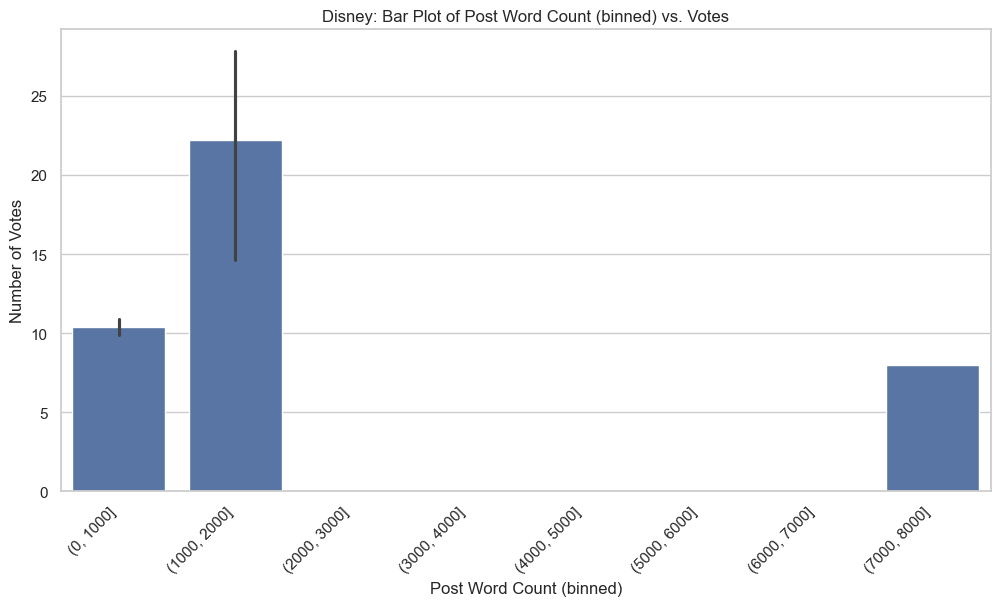

In [28]:
# Set figure size
plt.figure(figsize=(12, 6))

# Bin the 'post_word_count' into intervals of 1000
disney_df['post_word_count_bin'] = pd.cut(disney_df['post_word_count'], bins=range(0, max(disney_df['post_word_count'])+1000, 1000))

# Create a bar plot
sns.barplot(x='post_word_count_bin', y='vote', data=disney_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.title('Disney: Bar Plot of Post Word Count (binned) vs. Votes')
plt.xlabel('Post Word Count (binned)')
plt.ylabel('Number of Votes')

# Show the plot
plt.show()


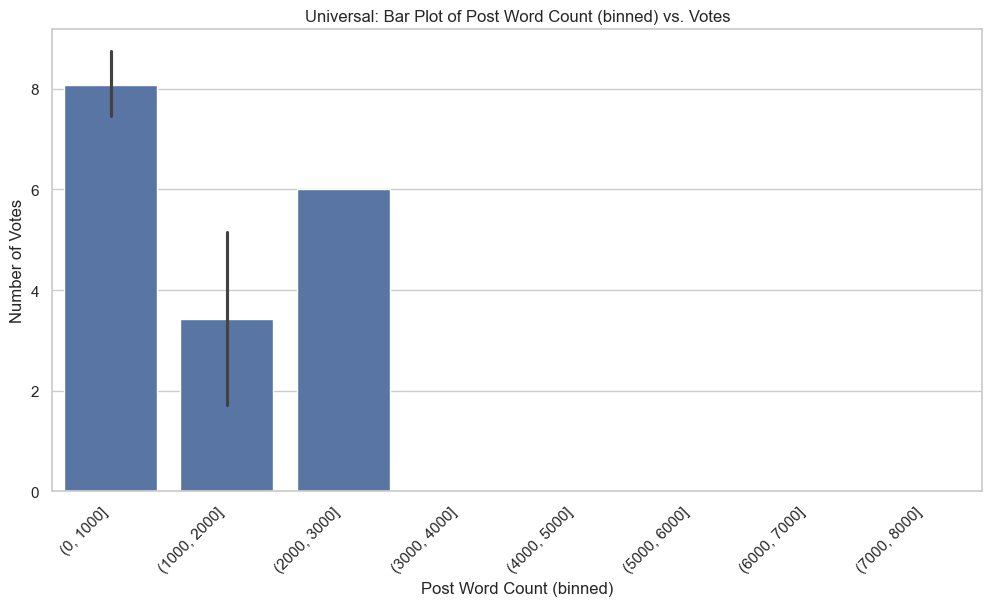

In [29]:
# Set figure size
plt.figure(figsize=(12, 6))

# Bin the 'post_word_count' into intervals of 1000
disney_df['post_word_count_bin'] = pd.cut(universal_df['post_word_count'], bins=range(0, max(disney_df['post_word_count'])+1000, 1000))

# Create a bar plot
sns.barplot(x='post_word_count_bin', y='vote', data=disney_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.title('Universal: Bar Plot of Post Word Count (binned) vs. Votes')
plt.xlabel('Post Word Count (binned)')
plt.ylabel('Number of Votes')

# Show the plot
plt.show()


**Word Count vs. Vote Analysis**
- No pattern has been shown that word count impacts the vote, there is no correlation

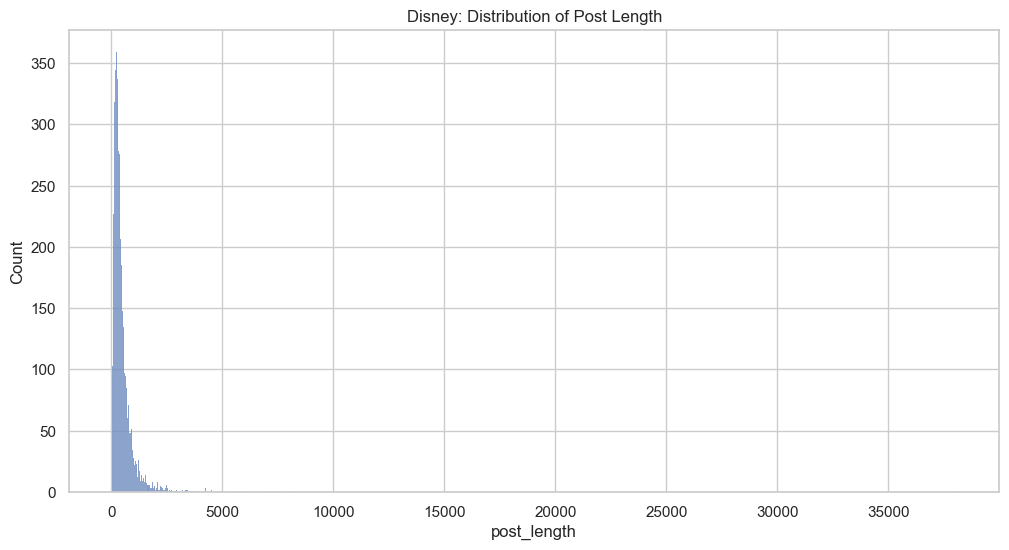

In [30]:
# Set up figure size
plt.figure(figsize=(12,6))

# Create histogram of disney's post length
sns.histplot(disney_df['post_length'])

# Create title
plt.title('Disney: Distribution of Post Length');

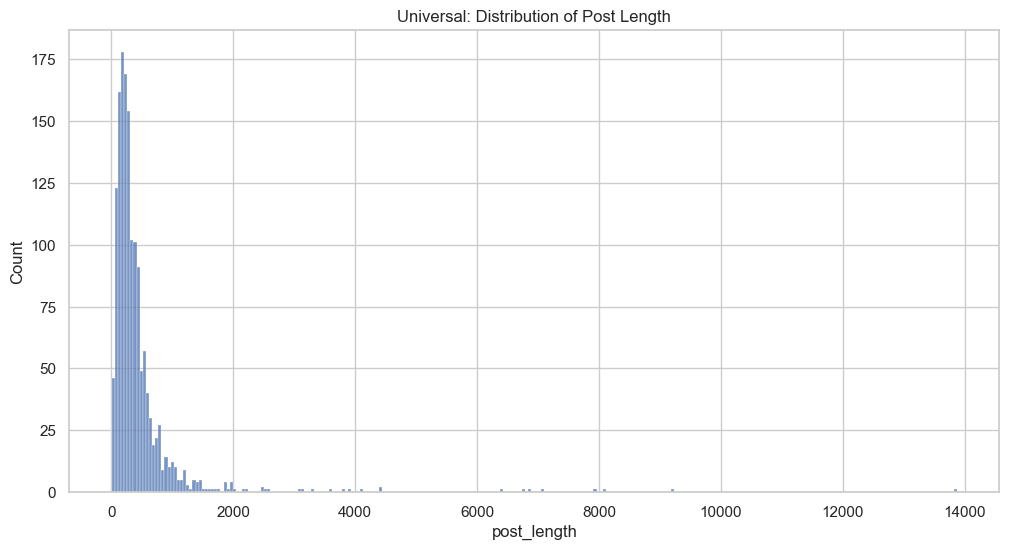

In [31]:
# Set up figure size
plt.figure(figsize=(12,6))

# Create histogram of universal post length
sns.histplot(universal_df['post_length'])

# Set title
plt.title('Universal: Distribution of Post Length');

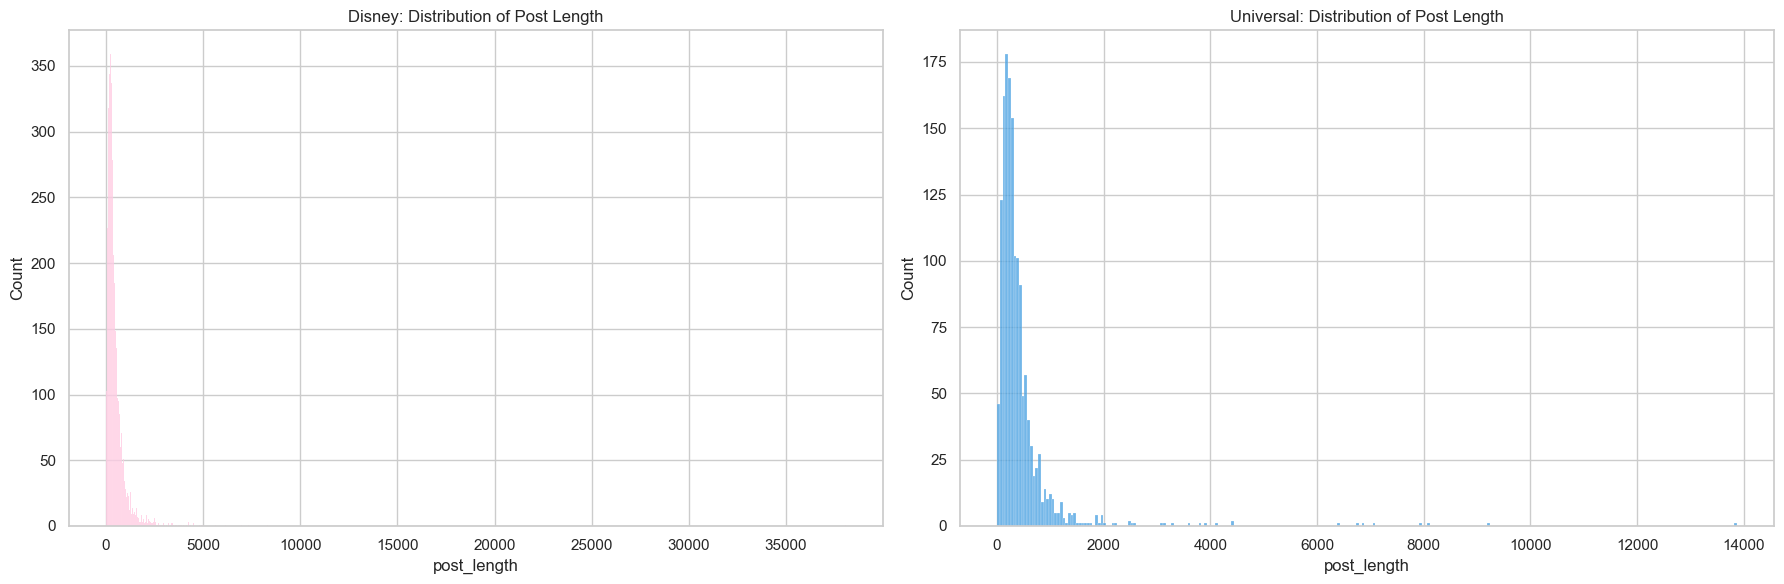

In [32]:
# Set up figure size
plt.figure(figsize=(18, 6))

# Create the first subplot for Disney DataFrame
plt.subplot(1, 2, 1)
sns.histplot(disney_df['post_length'], color='#ffc5e0')  # Specify color for Disney histogram
plt.title('Disney: Distribution of Post Length')

# Create the second subplot for Universal DataFrame
plt.subplot(1, 2, 2)
sns.histplot(universal_df['post_length'], color='#439ee1')  # Specify color for Universal histogram
plt.title('Universal: Distribution of Post Length')

# Adjust layout for better spacing (optional)
plt.tight_layout()

# Show the plot
plt.savefig('postlength.png')

**Post Length Distribution Analysis**
- Disney subreddit generally has posts with higher post length than Universal
- Both subreddits are right skewed, where lengths are normally less than 1000

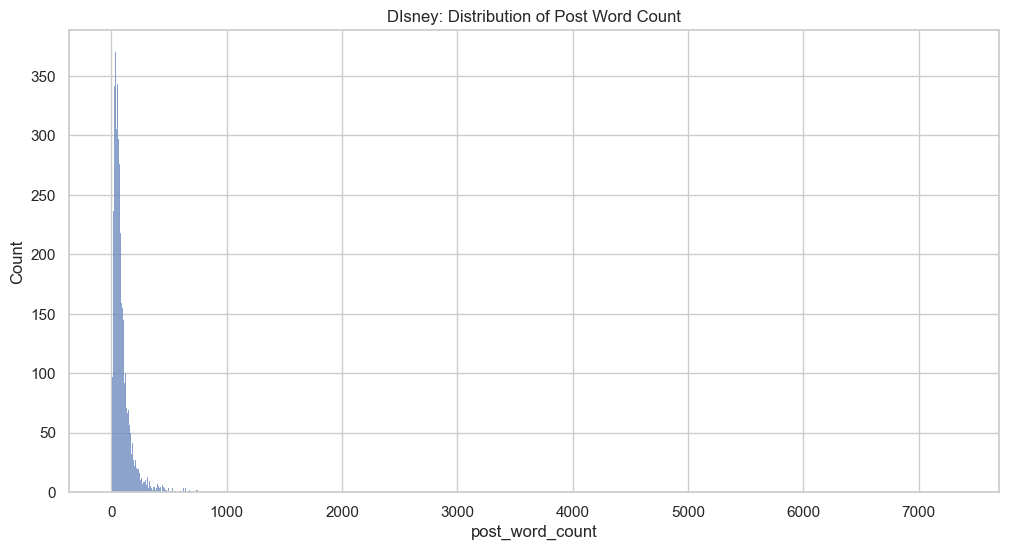

In [33]:
# Set up figure size
plt.figure(figsize=(12,6))

# Create histogram of disney word count
sns.histplot(disney_df['post_word_count'])

# Set title
plt.title('DIsney: Distribution of Post Word Count');

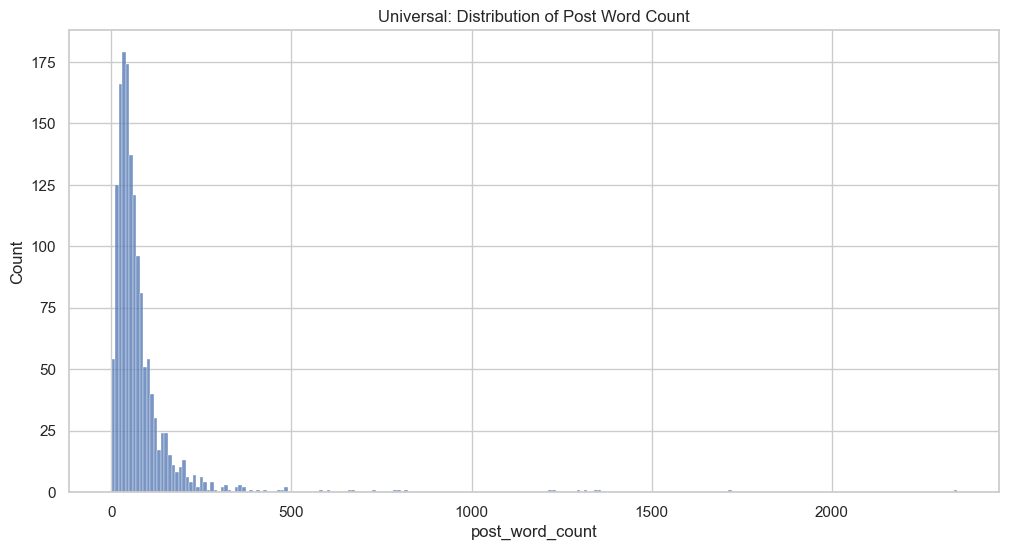

In [34]:
# Set up figure size
plt.figure(figsize=(12,6))

# Create histogram of universal word count
sns.histplot(universal_df['post_word_count'])

# Set title
plt.title('Universal: Distribution of Post Word Count');

**Post Word Count Analysis**
- Universal post generally has less word counts than Disney
- Both subreddit word counts are right skewed

In [35]:
# Initiate CountVectorizer with parameter to remove stop words
cvec = CountVectorizer(stop_words='english')

# Fit disney data text column to CountVectorizer
cvec.fit(disney_df['text'])

# Transform disney data text column to CountVectorizer
disney_post_cvec = cvec.transform(disney_df['text'])

# Create a dataframe with a dense matrix that with features from disney transformed text
disney_post_df = pd.DataFrame(disney_post_cvec.todense(), columns=cvec.get_feature_names_out())

In [36]:
# Preview the text feature in dense matrix of disney text data
disney_post_df.head()

,00,000,0000,0001,001,00am,00p,00pm,01,014,...,zooming_around_on_the_big_thunder,zooms,zootopia,zpebbr7,zpv2f3suilg,zzzzzzz,ºoº,über,ᴶᵘˢᵗ,ᴷᶦᵈᵈᶦᶰᵍ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Create a dataframe that sort the top 15 most occuring words from disney data 

disney_top_words = pd.DataFrame(disney_post_df.sum().sort_values(ascending=False).head(15), columns = ['Count'])

In [38]:
# Preview the disney_top_words dataframe
disney_top_words

,Count
disneyland,2451
just,1624
park,1526
time,1446
day,1348
know,1321
going,1305
disney,1272
like,1246
ve,974


/var/folders/0n/kzwpck_52r3g7z87p_fp5jlw0000gn/T/ipykernel_15540/2313931481.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y=disney_top_words.index , data=disney_top_words, palette = "coolwarm")


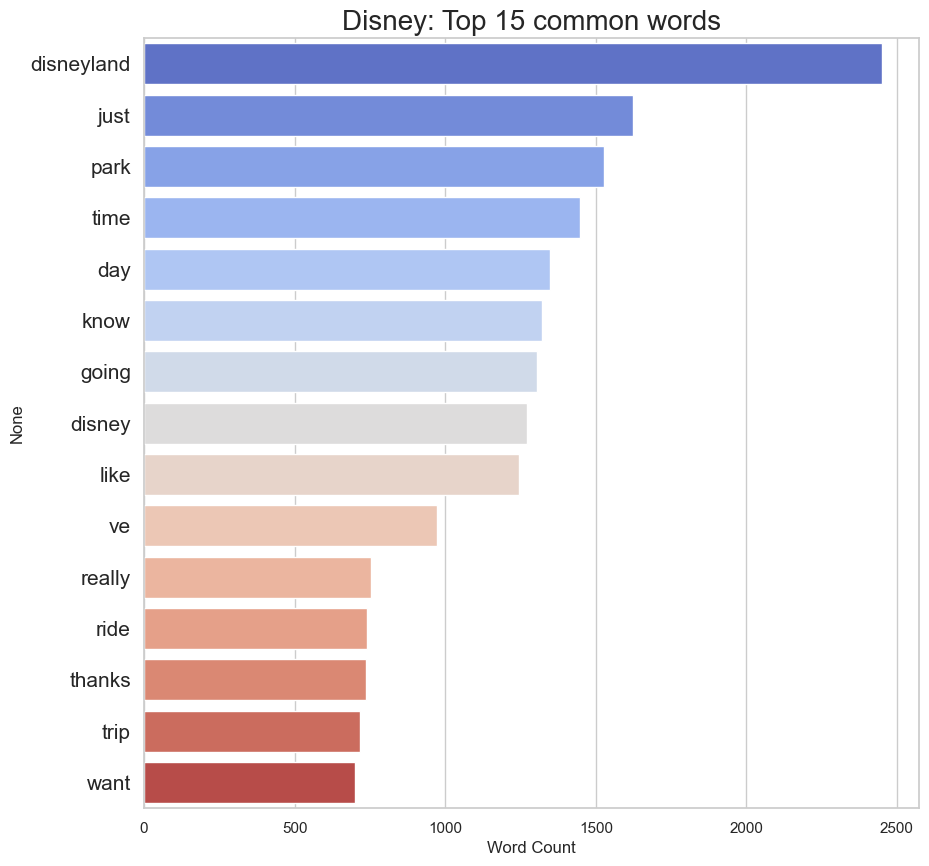

In [39]:
# Set figure size
plt.figure(figsize=(10, 10))

# Create a bar plot of the most occuring disney words 
sns.barplot(x='Count', y=disney_top_words.index , data=disney_top_words, palette = "coolwarm")

# Set title
plt.title('Disney: Top 15 common words',fontsize=20)

# Set x label
plt.xlabel('Word Count', fontsize=12)

# Set y label
plt.yticks(fontsize=15);

**Top common words analysis**
- Most words are generic and are unable to classify that these words come from disney data
- Contain stopwords and target words, stopwords and target words will be removed

In [40]:
# Initiate CountVectorizer with parameter to remove stop words
cvec = CountVectorizer(stop_words='english')

# Fit universal data text column to CountVectorizer
cvec.fit(universal_df['text'])

# Transform universal data text column to CountVectorizer
universal_post_cvec = cvec.transform(universal_df['text'])

# Create a dataframe with a dense matrix that with features from universal transformed text
universal_post_df = pd.DataFrame(universal_post_cvec.todense(), columns=cvec.get_feature_names_out())

In [41]:
# Preview the text feature in dense matrix of universal text data
universal_post_df.head()

,00,000,00a,00am,00ish,00p,00pm,02,03,06,...,zccgqiw,zelda,zero,zippered,zj8puige9z9v1qr1nu9z0w,zombie,zombies,zone,zones,zqhbb6
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Create a dataframe that sort the top 15 most occuring words from universal data 

universal_top_words = pd.DataFrame(universal_post_df.sum().sort_values(ascending=False).head(15), columns = ['Count'])
universal_top_words

,Count
universal,859
park,711
day,624
time,520
just,492
going,486
pass,481
ride,473
know,435
like,429


/var/folders/0n/kzwpck_52r3g7z87p_fp5jlw0000gn/T/ipykernel_15540/3681258562.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y=universal_top_words.index , data=universal_top_words, palette = "coolwarm")


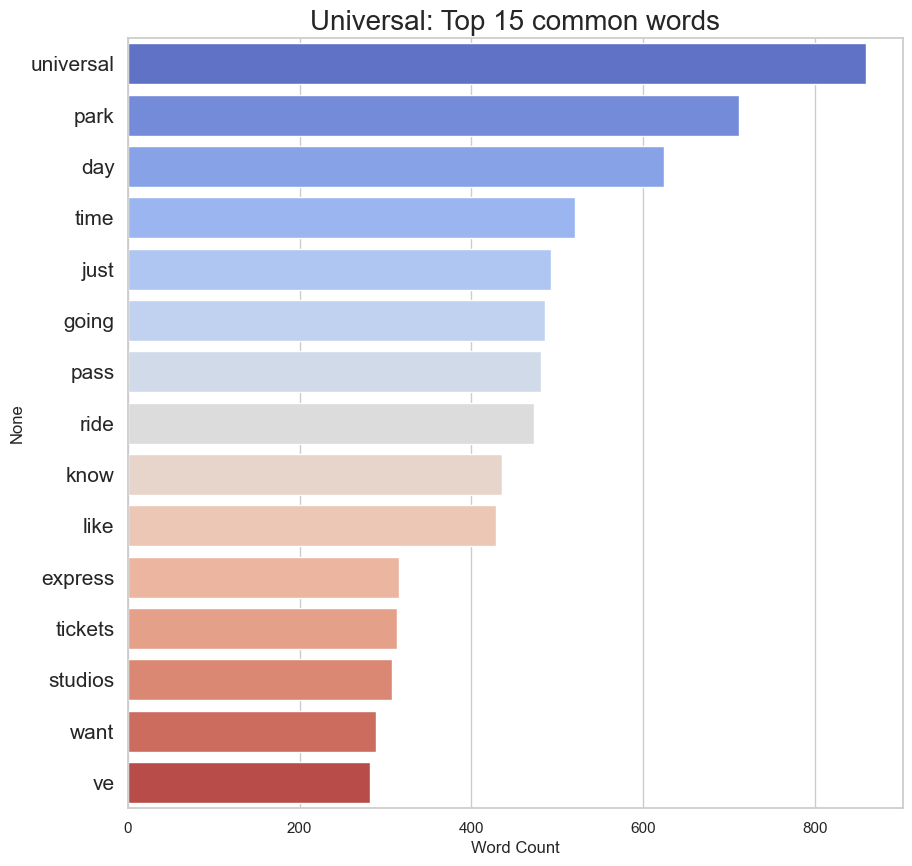

In [43]:
# Set figure size
plt.figure(figsize=(10, 10))

# Create a bar plot of the most occuring universal words 
sns.barplot(x='Count', y=universal_top_words.index , data=universal_top_words, palette = "coolwarm")

# Set title
plt.title('Universal: Top 15 common words',fontsize=20)

# Set x label
plt.xlabel('Word Count', fontsize=12)

# Set y label
plt.yticks(fontsize=15);

**Top common words analysis**
- Most words are generic and are unable to classify that these words come from Universal data
- Contain stopwords and target words that will have to be removed

In [44]:
# Create a list of words that appear in both subreddits using the index of each subreddit top words dataframe and intersect together
both_subreddits = list(set(disney_top_words.index).intersection(universal_top_words.index))
both_subreddits

['day', 'going', 've', 'time', 'just', 'want', 'park', 'like', 'know', 'ride']

In [45]:
# Generate a list of both words that appear in both subreddit and a list of words that appear uniquely in each subreddit

# Generate a list of index of disney and universal top words
disney_words = list(disney_top_words.index)
universal_words = list(universal_top_words.index)

print('====== Both =======')
print(both_subreddits)

print('=====Disney=====')
# For loop that extract list of item that appear in disney_words list but not in universal_words list
print([x for x in disney_words if x not in set(universal_words)])

print('=====Universal=====')
# For loop that extract list of item that appear in universal_words list but not in disney_words list
print([x for x in universal_words if x not in set(disney_words)])

====== Both =======
['day', 'going', 've', 'time', 'just', 'want', 'park', 'like', 'know', 'ride']
=====Disney=====
['disneyland', 'disney', 'really', 'thanks', 'trip']
=====Universal=====
['universal', 'pass', 'express', 'tickets', 'studios']


In [46]:
# Initiate CountVectorizer with parameter to remove stop words and consider only 2 adjacent words
cvec_bigrams = CountVectorizer(ngram_range=(2, 2), stop_words='english')

# Fit disney bigram text column to CountVectorizer
cvec_bigrams.fit(disney_df['text'])

# Transform disney bigram text column to CountVectorizer
bigrams_cvec = cvec_bigrams.transform(disney_df['text'])

# Create a dataframe with a dense matrix that with features from disney bigram transformed text
bigrams_df = pd.DataFrame(bigrams_cvec.todense(), columns=cvec_bigrams.get_feature_names_out())

# Create a dataframe that sort the top 15 most occuring words from disney bigram data 
disney_top_biwords = pd.DataFrame(bigrams_df.sum().sort_values(ascending=False).head(15), columns = ['Count'])
disney_top_biwords

,Count
going disneyland,200
does know,195
california adventure,187
cast member,157
annual pass,140
space mountain,133
cast members,126
haunted mansion,124
world color,118
downtown disney,117


**Top Bigram Commmon Words Analysis**
- With Bigram parameter, the words are more distinct than 1-gram, classigying that these are unique to Disneyland
- Some unique words are california adventure, space mountain, huanted mansion, star wars
- Stopwords and target words have to be removed

In [47]:
# Initiate CountVectorizer with parameter to remove stop words and consider only 2 adjacent words
cvec_bigrams = CountVectorizer(ngram_range=(2, 2), stop_words='english')

# Fit universal bigram text column to CountVectorizer
cvec_bigrams.fit(universal_df['text'])

# Transform universal bigram text column to CountVectorizer
bigrams_cvec = cvec_bigrams.transform(universal_df['text'])

# Create a dataframe with a dense matrix that with features from universal bigram transformed text
bigrams_df = pd.DataFrame(bigrams_cvec.todense(), columns=cvec_bigrams.get_feature_names_out())

# Create a dataframe that sort the top 15 most occuring words from universal bigram data 
universal_top_biwords = pd.DataFrame(bigrams_df.sum().sort_values(ascending=False).head(15), columns = ['Count'])
universal_top_biwords

,Count
universal studios,286
harry potter,178
express pass,141
studios hollywood,97
nintendo world,82
universal orlando,79
going universal,78
does know,76
super nintendo,67
annual pass,66


**Top Bigram Commmon Words Analysis**
- With Bigram parameter, the words are more distinct than 1-gram, classigying that these are unique to Universal
- Some unique words are harry potter, studios hollywood, nintendo world, super nintendo, horror nights
- Stop words and target words have to be removed

In [48]:
# Initiate CountVectorizer with parameter to remove stop words and consider only 2 adjacent words
cvec_trigrams = CountVectorizer(ngram_range=(3, 3), stop_words='english')

# Fit disney trigram text column to CountVectorizer
cvec_trigrams.fit(disney_df['text'])

# Transform disney trigram text column to CountVectorizer
trigrams_cvec = cvec_trigrams.transform(disney_df['text'])

# Create a dataframe with a dense matrix that with features from disney trigram transformed text
trigrams_df = pd.DataFrame(trigrams_cvec.todense(), columns=cvec_trigrams.get_feature_names_out())

# Create a dataframe that sort the top 15 most occuring words from disney trigram data 
disney_top_triwords = pd.DataFrame(trigrams_df.sum().sort_values(ascending=False).head(15), columns = ['Count'])
disney_top_triwords

,Count
http imgur com,55
day park hopper,52
disneyland california adventure,39
star wars land,35
happiest place earth,27
mickey halloween party,26
disney california adventure,26
radiator springs racers,26
want make sure,24
walt disney world,23


**Top Trigram Commmon Words Analysis**
- With Trigram parameter, the words are almost all unique to Disney
- Appearing on the list is the url which needs to be removed, as well as target words

In [49]:
# Initiate CountVectorizer with parameter to remove stop words and consider only 2 adjacent words
cvec_trigrams = CountVectorizer(ngram_range=(3, 3), stop_words='english')

# Fit universal trigram text column to CountVectorizer
cvec_trigrams.fit(universal_df['text'])

# Transform universal trigram text column to CountVectorizer
trigrams_cvec = cvec_trigrams.transform(universal_df['text'])

# Create a dataframe with a dense matrix that with features from universal trigram transformed text
trigrams_df = pd.DataFrame(trigrams_cvec.todense(), columns=cvec_trigrams.get_feature_names_out())

# Create a dataframe that sort the top 15 most occuring words from universal trigram data 
universal_top_triwords = pd.DataFrame(trigrams_df.sum().sort_values(ascending=False).head(15), columns = ['Count'])
universal_top_triwords

,Count
universal studios hollywood,95
super nintendo world,61
halloween horror nights,34
going universal studios,33
harry potter world,24
universal orlando resort,20
day park park,17
universal studios orlando,17
jurassic park ride,14
universal studios florida,14


**Top Trigram Commmon Words Analysis**
- With Trigram parameter, the words are almost all unique to Universal
- Appearing on the list are target wods

## Data Combining

In [50]:
# Create new column subreddit with Disneyland in every row 
disney_df['subreddit'] = 'Disneyland'

# Create new column mapped_subreddit with 1 in every row 
disney_df['mapped_subreddit'] = 1

# Create new column subreddit with universalstudios in every row 
universal_df['subreddit'] = 'universalstudios'

# Create new column mapped_subreddit with 0 in every row 
universal_df['mapped_subreddit'] = 0

In [51]:
# Concatinate two dataframe disney and universal together 
combined_df = pd.concat([disney_df, universal_df], axis=0)

In [52]:
# Preview the combined df
combined_df.head()

,vote,title,text,date,post_length,post_word_count,post_word_count_bin,subreddit,mapped_subreddit
0,12,[Poll] Is this ok?,"Hey, /r/disneyland. I think I'll try and post ...",2011-10-04,242,43,"(0, 1000]",Disneyland,1
1,8,Favorite Land?,"So, what's YOUR favorite land in Disneyland?",2011-10-09,44,7,"(0, 1000]",Disneyland,1
2,4,Does anyone have any pictures from inside club...,Hey everyone! I don't know if you're allowed t...,2011-10-10,207,39,"(0, 1000]",Disneyland,1
3,4,Who is your favorite face character?,I love Bert and Mary. I think it's something a...,2011-10-10,357,65,"(0, 1000]",Disneyland,1
4,7,Does Disneyland drug test employees? (x-post f...,"I have an interview Friday, and I'd like to kn...",2011-11-10,293,59,"(0, 1000]",Disneyland,1


In [53]:
# Create dataframe called df that has the specified column from combined_df
df = combined_df[['mapped_subreddit', 'text', 'title']]

In [54]:
# Create new column post that combined text column and title column
df['post'] = combined_df['text'] + combined_df['title'] 

/var/folders/0n/kzwpck_52r3g7z87p_fp5jlw0000gn/T/ipykernel_15540/966064700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['post'] = combined_df['text'] + combined_df['title']


In [55]:
# Preview df
df.head()

,mapped_subreddit,text,title,post
0,1,"Hey, /r/disneyland. I think I'll try and post ...",[Poll] Is this ok?,"Hey, /r/disneyland. I think I'll try and post ..."
1,1,"So, what's YOUR favorite land in Disneyland?",Favorite Land?,"So, what's YOUR favorite land in Disneyland?Fa..."
2,1,Hey everyone! I don't know if you're allowed t...,Does anyone have any pictures from inside club...,Hey everyone! I don't know if you're allowed t...
3,1,I love Bert and Mary. I think it's something a...,Who is your favorite face character?,I love Bert and Mary. I think it's something a...
4,1,"I have an interview Friday, and I'd like to kn...",Does Disneyland drug test employees? (x-post f...,"I have an interview Friday, and I'd like to kn..."


## Sentiment Analysis

In [56]:
# Create new dataframe for Sentiment Analysis
columns = ['subreddit', 'mapped_subreddit', 'text']
sent_df = combined_df[columns]

In [57]:
# Initiate Sentiment Intensity Analyzer and assign polarity score to each text
sentiment = SentimentIntensityAnalyzer()
sentiment_score = [sentiment.polarity_scores(i) for i in sent_df.text]

In [58]:
# Create dataframe of sentiment score
sentiment_score_df = pd.DataFrame(sentiment_score)
sentiment_score_df.head()

,neg,neu,pos,compound
0,0.027,0.893,0.080,0.2971
1,0.000,0.648,0.352,0.5046
2,0.000,0.881,0.119,0.6941
3,0.054,0.620,0.326,0.9733
4,0.042,0.909,0.049,0.3434


In [59]:
# Reset the index of the DataFrame 'sent_df' and drop the old index column
sent_df.reset_index(drop=True, inplace=True)

# Reset the index of the DataFrame 'sentiment_score_df' and drop the old index column
sentiment_score_df.reset_index(drop=True, inplace=True)

In [60]:
# Combining sent_df and sentiment_score_df
sentiment_df = pd.concat([sent_df, sentiment_score_df], axis=1)

In [61]:
# Preview sent_df
sentiment_df.head()

,subreddit,mapped_subreddit,text,neg,neu,pos,compound
0,Disneyland,1,"Hey, /r/disneyland. I think I'll try and post ...",0.027,0.893,0.080,0.2971
1,Disneyland,1,"So, what's YOUR favorite land in Disneyland?",0.000,0.648,0.352,0.5046
2,Disneyland,1,Hey everyone! I don't know if you're allowed t...,0.000,0.881,0.119,0.6941
3,Disneyland,1,I love Bert and Mary. I think it's something a...,0.054,0.620,0.326,0.9733
4,Disneyland,1,"I have an interview Friday, and I'd like to kn...",0.042,0.909,0.049,0.3434


In [62]:
# Show the mean sentiment score of each subreddit
sentiment_df[['subreddit', 'neg', 'neu', 'pos', 'compound']].groupby('subreddit').mean().round(2)

,neg,neu,pos,compound
subreddit,,,,
Disneyland,0.03,0.84,0.12,0.50
universalstudios,0.03,0.86,0.11,0.41


**Sentiment Analysis**
- Disneyland post is 0.01 more positive than Universal Studios
- In general, Disneyland and Universal Studios posts are neutral, with score of approximately 0.85

## Data Pre-processing

**Reasons for data preprocessing**
- For simplifying the language processing procedure and for inserting into the model, text data needs to be pre-process by ways of tokenize, lemmatize, stop words and irrelevant words removal
- Tokenizing will break down texts into smaller units while lemmatizing will transform the word into the root form
- Regular expression is used for removing irrelevant words
- 4 columns are created where combinations of pre-processing techniques are performed: 1. tokenizing only 2. tokenizing and lemmatizing 3. tokenizing and stop words removal 4. tokenizing + lemmatizing + stop words removal

In [63]:
%%time

# Set up function tenize with input text and parameter for lemmatizing and removing stop words set as false
def tokenize(text, lemmatize=True, remove_stopword=False):
    # Remove URL
    text = re.sub(r'https?.+?(?:\s|$)', '', text)
    # Remove disneyland case insensitive
    text = re.sub(r'disney(land)?', '', text, flags=re.I) 
    # Remove universalstudios case insensitive
    text = re.sub(r'universal(studios?)?', '', text, flags=re.I) 
    # Process the text using the nlp pipeline
    doc = nlp(text)
    # Check if lemmatization is enabled
    if lemmatize:
    # Check if stopwords removal is also enabled
        if remove_stopword:
        # If both lemmatization and stopwords removal are enabled, join lemmatized tokens excluding stopwords
            return ' '.join([token.lemma_ for token in doc if not token.is_stop])
        else:
        # If only lemmatization is enabled, join lemmatized tokens
            return ' '.join([token.lemma_ for token in doc])
    else:
    # If lemmatization is not enabled
    # Check if stopwords removal is enabled
        if remove_stopword:
        # If only stopwords removal is enabled, join lowercase tokens excluding stopwords
            return ' '.join([token.text.lower() for token in doc if not token.is_stop])
        else:
        # If neither lemmatization nor stopwords removal is enabled, join lowercase tokens
            return ' '.join([token.text.lower() for token in doc])
            
# Create a new column 'tokenized' containing tokens without lemmatization and stopwords removal
df['tokenized'] = df['post'].apply(lambda x: tokenize(x, lemmatize=False, remove_stopword=False))
# Create a new column 'tokenized_lemma' containing lemmatized tokens without stopwords removal
df['tokenized_lemma'] = df['post'].apply(lambda x: tokenize(x, lemmatize=True, remove_stopword=False))
# Create a new column 'tokenized_nostop' containing tokens without lemmatization but with stopwords removal
df['tokenized_nostop'] = df['post'].apply(lambda x: tokenize(x, lemmatize=False, remove_stopword=True))
# Create a new column 'tokenized_lemma_nostop' containing lemmatized tokens with stopwords removal
df['tokenized_lemma_nostop'] = df['post'].apply(lambda x: tokenize(x, lemmatize=True, remove_stopword=True))


#df['tokenized'] = df['post'].str.lower().apply(lambda x: ' '.join(tokenizer.tokenize(x)))


<timed exec>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 8min 24s, sys: 38.4 s, total: 9min 2s
Wall time: 10min 20s


<timed exec>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [64]:
# Preview data
df.head()

,mapped_subreddit,text,title,post,tokenized,tokenized_lemma,tokenized_nostop,tokenized_lemma_nostop
0,1,"Hey, /r/disneyland. I think I'll try and post ...",[Poll] Is this ok?,"Hey, /r/disneyland. I think I'll try and post ...","hey , /r/. i think i 'll try and post cool p...","hey , /r/. I think I 'll try and post cool p...","hey , /r/. think try post cool pictures whil...","hey , /r/. think try post cool picture while..."
1,1,"So, what's YOUR favorite land in Disneyland?",Favorite Land?,"So, what's YOUR favorite land in Disneyland?Fa...","so , what 's your favorite land in ? favorite ...","so , what be your favorite land in ? Favorite ...",", favorite land ? favorite land ?",", favorite land ? Favorite Land ?"
2,1,Hey everyone! I don't know if you're allowed t...,Does anyone have any pictures from inside club...,Hey everyone! I don't know if you're allowed t...,hey everyone ! i do n't know if you 're allowe...,hey everyone ! I do n't know if you be allow t...,hey ! know allowed photos fascinated things ...,hey ! know allow photo fascinate thing place...
3,1,I love Bert and Mary. I think it's something a...,Who is your favorite face character?,I love Bert and Mary. I think it's something a...,i love bert and mary . i think it 's something...,I love Bert and Mary . I think it be something...,love bert mary . think lower energy peter alic...,love Bert Mary . think low energy Peter Alice ...
4,1,"I have an interview Friday, and I'd like to kn...",Does Disneyland drug test employees? (x-post f...,"I have an interview Friday, and I'd like to kn...","i have an interview friday , and i 'd like to ...","I have an interview Friday , and I would like ...","interview friday , like know drug tests hiri...","interview Friday , like know drug test hire ..."


In [65]:
# Save data to csv file
df.to_csv('tokenized_df.csv')